In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
g = nx.read_adjlist('india.txt')

<h1> Degree distribution </h1>

Plot a histogram of the degree distribution of the graph:

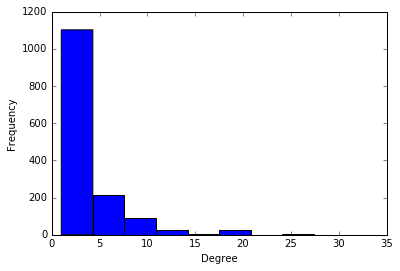

In [34]:
degrees = [g.degree(v) for v in g.nodes()]
plt.hist(degrees)
plt.xlabel('Degree')
plt.ylabel('Frequency')

<h1>Clustering coefficient</h1>

Print out the clustering coefficient of the India network:

In [21]:
nx.average_clustering(g)

0.20135824278023776

Now, create an Erdos-Renyi random graph and calculate its clustering coefficient:

In [22]:
avg_degree = np.mean([g.degree(v) for v in g.nodes()])
g_random = nx.random_graphs.erdos_renyi_graph(len(g), avg_degree/len(g))
nx.average_clustering(g_random)

0.01837822403039794

# Diameter and path length 

How many nodes are in the India network?

In [23]:
len(g)

345

A function to get the largest connected component in a network:

In [25]:
def get_largest_component(g):
    largest_component = list(nx.connected_component_subgraphs(g))[0]
    for comp in nx.connected_component_subgraphs(g):
        if len(comp) > len(largest_component):
            largest_component = comp
    return largest_component

Now calculate the diameter and average path length in this component:

In [26]:
largest_component = get_largest_component(g)
nx.diameter(largest_component)

8

In [28]:
nx.average_shortest_path_length(largest_component)

3.9087855693655906

Switch to the netscience dataset and calculate these same quantities

In [29]:
g = nx.read_adjlist('netscience.txt')

In [30]:
len(g)

1461

In [35]:
largest_component = get_largest_component(g)
nx.diameter(largest_component)

17

In [32]:
nx.average_shortest_path_length(largest_component)

6.041867347935949

# Assortivity

### Measure assortivity coefficient

In [36]:
nx.degree_assortativity_coefficient(g)

0.46162246675258339

In [37]:
g = nx.read_adjlist('india.txt')
nx.degree_assortativity_coefficient(g)

0.15851449129771222

Now try some random networks

In [63]:
g = nx.barabasi_albert_graph(100, 5)

In [64]:
nx.degree_assortativity_coefficient(g)

-0.033349932568460416

In [55]:
g = nx.erdos_renyi_graph(100, 0.05)

In [56]:
nx.degree_assortativity_coefficient(g)

-0.010812367463414553

### Visualize the assortivity pattern

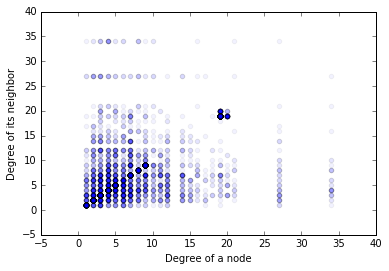

In [117]:
g = nx.read_adjlist('netscience.txt')
points = []
for v in g.nodes():
    for u in g.neighbors(v):
        points.append((g.degree(u), g.degree(v)))
plt.scatter([x[0] for x in points], [x[1] for x in points], alpha=0.05)
plt.xlabel('Degree of a node')
plt.ylabel('Degree of its neighbor')

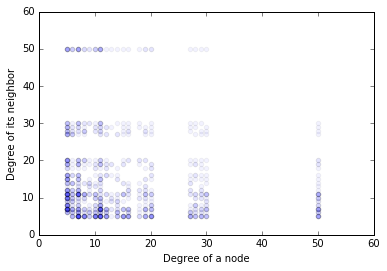

In [122]:
g = nx.barabasi_albert_graph(100, 5)
points = []
for v in g.nodes():
    for u in g.neighbors(v):
        points.append((g.degree(u), g.degree(v)))
plt.scatter([x[0] for x in points], [x[1] for x in points], alpha=0.05)
plt.xlabel('Degree of a node')
plt.ylabel('Degree of its neighbor')

# Centrality

Draw nodes in the graph with size proportional to their eigenvector centrality:

In [91]:
g = nx.read_adjlist('india.txt')
centrality = nx.eigenvector_centrality(g)

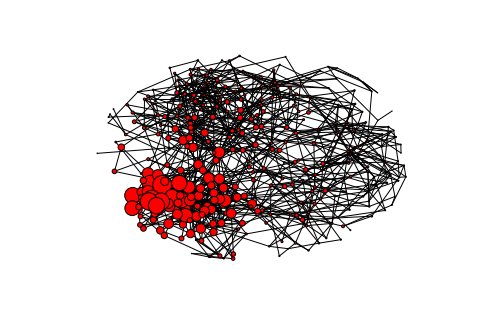

In [92]:
all_centralities = np.array([centrality[v] for v in g.nodes()])
all_centralities /= all_centralities.sum()
all_centralities = all_centralities
all_centralities *= 10000
nx.draw(g, node_size = all_centralities)

Now try betweenness centrality:

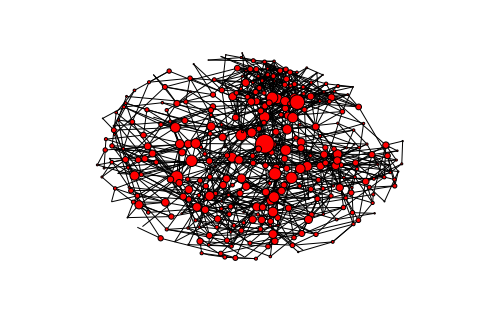

In [93]:
centrality = nx.betweenness_centrality(g)
all_centralities = np.array([centrality[v] for v in g.nodes()])
all_centralities /= all_centralities.sum()
all_centralities = all_centralities
all_centralities *= 10000
nx.draw(g, node_size = all_centralities)

# Community detection

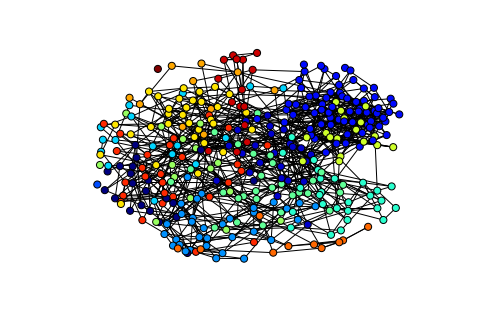

In [11]:
import community
g = nx.read_adjlist('india.txt')
part = community.best_partition(g)
nx.draw(g, node_color=[part[v] for v in g.nodes()], node_size=50)

Print out the modularity of this partition, and compare to the modularity for a random preferential attachment graph:

In [13]:
print(community.modularity(part, g))

0.620283903694


In [20]:
g = nx.barabasi_albert_graph(100, 5)
print(community.modularity(community.best_partition(g), g))

0.258220498615


# Influence Maximization

In [14]:
from influence_maximization import greedy
g = nx.read_adjlist('india.txt', nodetype=int)
#propagation probability
p = 0.2
#number of seeds to select
K = 10
S, influence = greedy(g, p, K)
print(influence)

141.61


Draw the network with seed nodes highlighted:

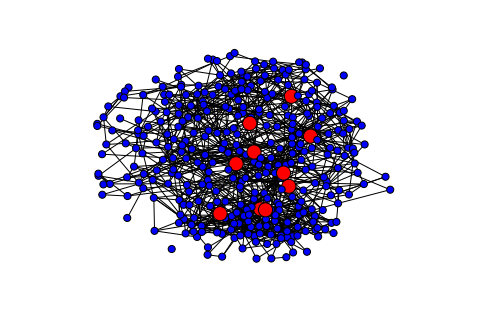

In [6]:
node_size = [200 if v in S else 50 for v in g.nodes()]
node_color = ['r' if v in S else 'b' for v in g.nodes()]
nx.draw(g, node_size=node_size, node_color=node_color)

Make each node's color proportional to the probability that it is influenced:

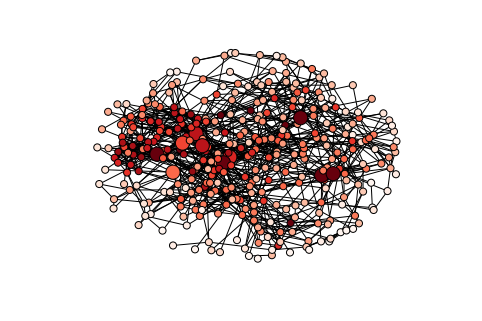

In [16]:
import matplotlib
from influence_maximization import make_rr_sets, eval_node_rr
pr_influenced = []
for v in g.nodes():
    rr_sets = make_rr_sets(nx.to_numpy_matrix(g)*p, 20, [v])
    pr_influenced.append(eval_node_rr([], S, 1, rr_sets))
nx.draw(g, node_color = pr_influenced, node_size=node_size, cmap = matplotlib.cm.Reds)